# Bike sharing case Study

Perform Exploratory data analysis (EDA) - 
(Data understanding, data cleaning, analyse categorical and continouse variables, drop unwanted column or rows, add derived variables univeriat analysis, biveriate analysis)

- Data understanding
- Data cleaning (missing values, invalid values, drop rows or column)
- Data Analysis

Model building

Model Training and Evaluation

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 1. Data understanding

In [2]:
df = pd.read_csv('day.csv')
bikesharing = df.copy()
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikesharing.shape

(730, 16)

### Data dictionary

	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [4]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## 2. Data cleaning

In [5]:
# rename column for better readability
bikesharing.rename(columns={'yr':'year', 'mnth': 'month', 'hum':'humidity', 'cnt':'count'}, inplace=True)

In [6]:
#droping duplicates
bikesharing.drop_duplicates(inplace=True)

In [7]:
bikesharing.shape

(730, 16)

#### Aa the shape is same after dropping duplicates, that means there are no duplicates in the original dateset

In [8]:
# droping unwanted columns 
#    - instant --> not requred because it just carries index info
#    - dteday --> not required as the same information is avaialble in month, year and weekday columns
#    - casual and registered --> not needed as the same data is available in cnt
bikesharing.drop(['instant', 'dteday','casual','registered'], inplace=True, axis=1)

In [9]:
bikesharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
bikesharing.shape

(730, 12)

In [11]:
# categorical variables - (season, weathersit, year, month, holiday, weekday, workingday

# Encoding/mapping season

season_dict = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bikesharing.season = bikesharing.season.map(season_dict)

In [12]:
# Encoding/mapping year

year_dict = {0:2018, 1:2019}
bikesharing.year = bikesharing.year.map(year_dict)

In [13]:
# Encoding/mapping month

month_dict = {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}
bikesharing.month = bikesharing.month.map(month_dict)

In [14]:
# Encoding/mapping weekday

weekday_dict = {0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}
bikesharing.weekday = bikesharing.weekday.map(weekday_dict)

In [15]:
# Encoding/mapping windspeed

windspeed_dict = {1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'}
bikesharing.weathersit = bikesharing.weathersit.map(windspeed_dict)

In [16]:
bikesharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,2018,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
bikesharing.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2018.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2018.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2018.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,2018.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,2019.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,2019.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## 3. Data Visualization

In [18]:
# Analysing or visualizing Categorical variable to see how predictor variable stands against the target variable.

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x = column, y='count',data=bikesharing, palette='husl')
    plt.subplot(1,2,2)
    sns.barplot(x = column, y='count',data=bikesharing, hue='year',palette='Set1')
    plt.show()


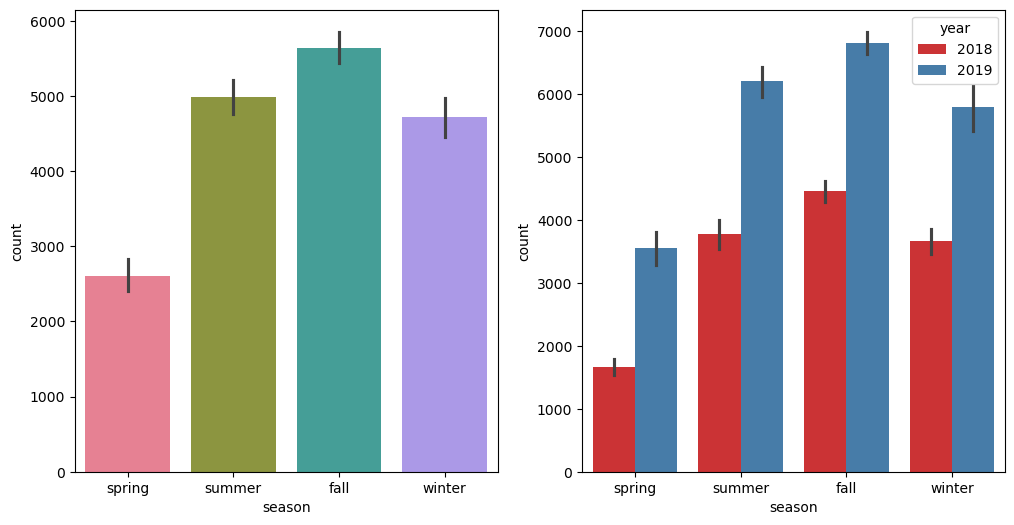

In [19]:
# plotting visualization for season column

plot_cat_columns('season')

#### Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

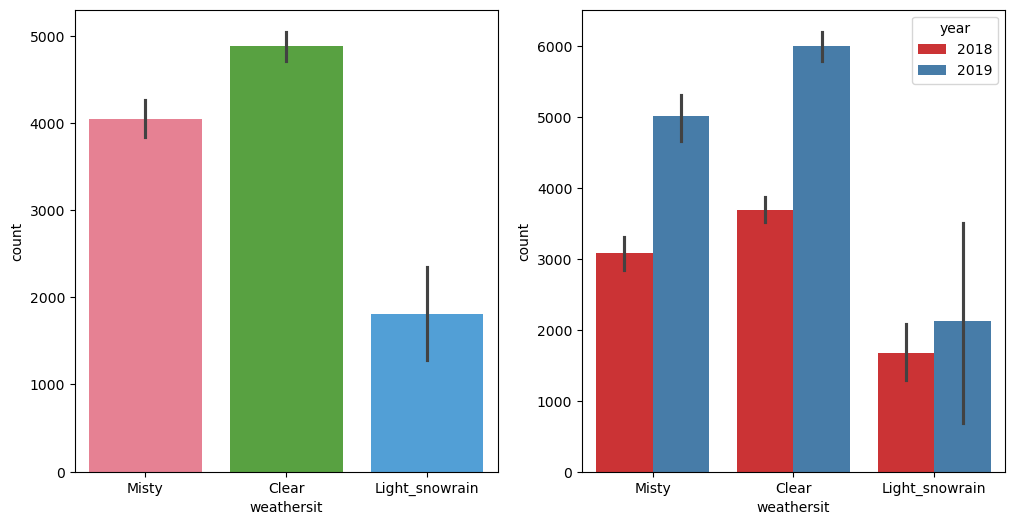

In [20]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

### Clear weather attracted more booking and for all weather conditions booking has increased from 2018 to 2019

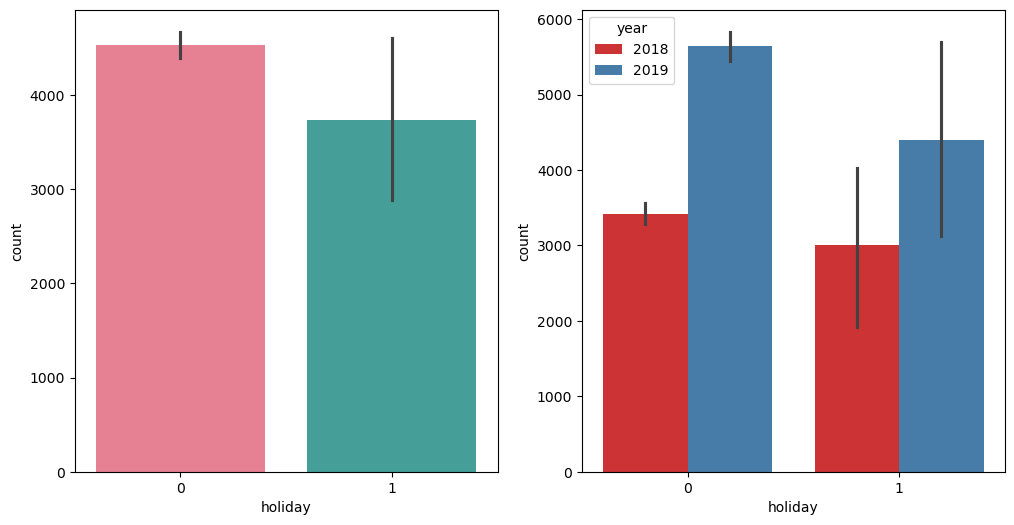

In [21]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

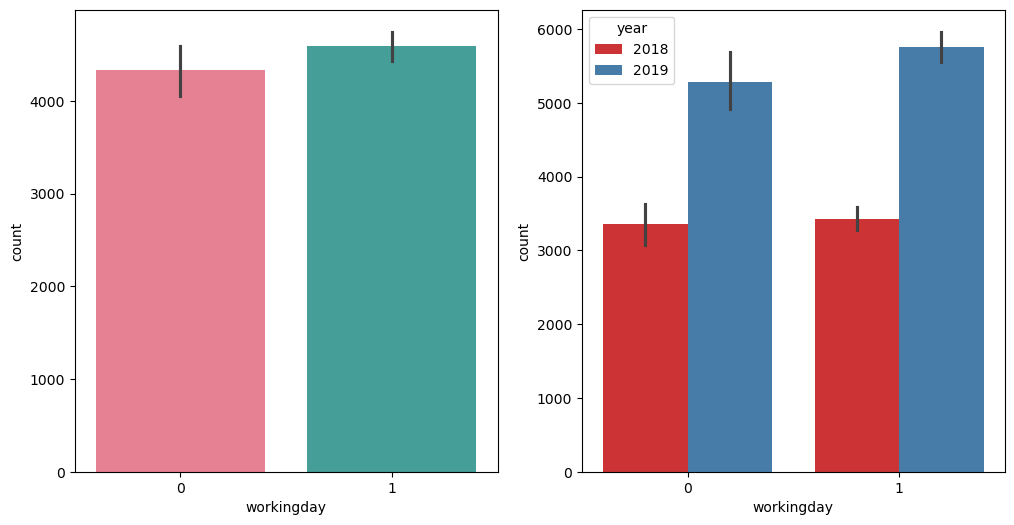

In [22]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

#### 1 -> working day and 0 -> not working day.. working day seems to be attracting more booking and its increased from 2018 to 2019

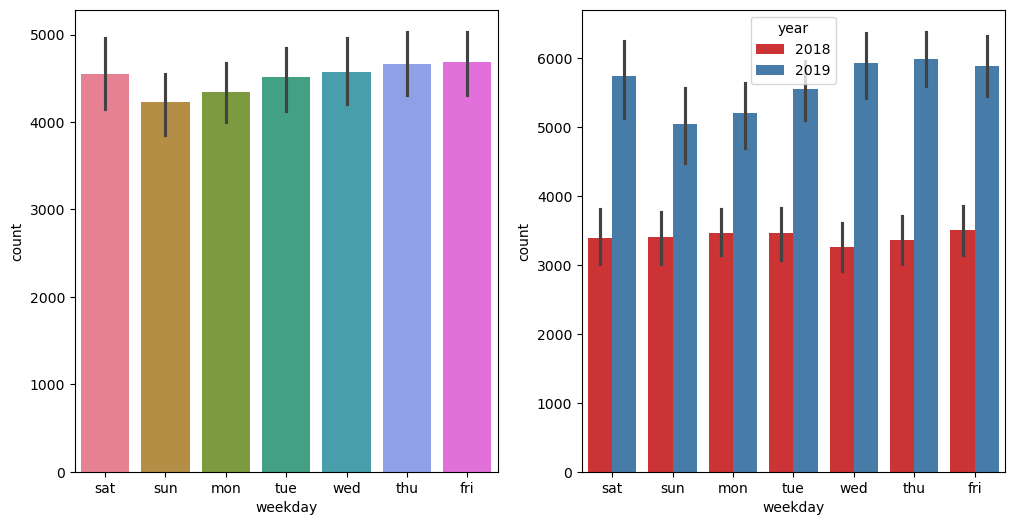

In [23]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

#### - Thu, Fri and Sat have more number of bookings as compared to the start of the week.

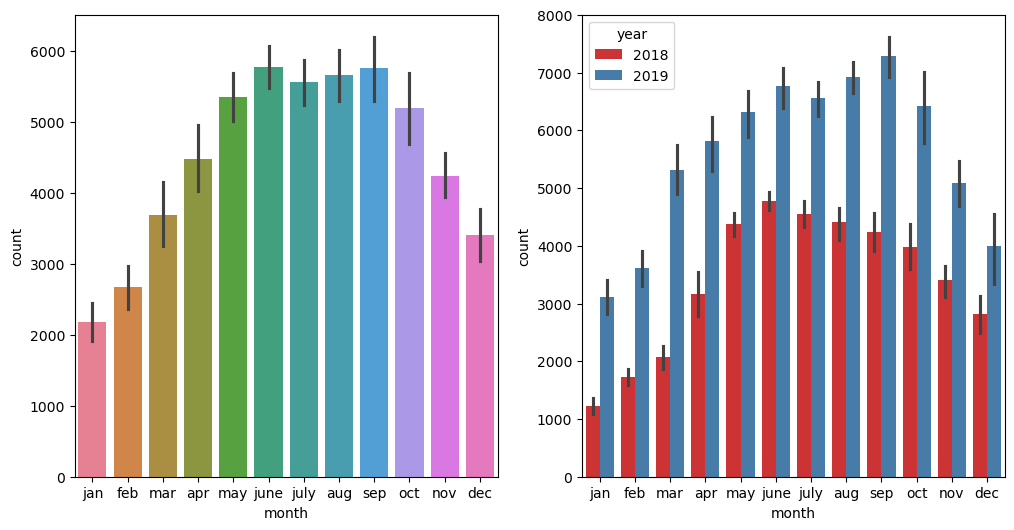

In [24]:
# plotting visualization for month column

plot_cat_columns('month')

##### - Overall Wheather considtion plays signicant role in deciding the conversion rate. Fall season, clear sky and middle months of the year attracts more booking and it is significantly increasing year on year

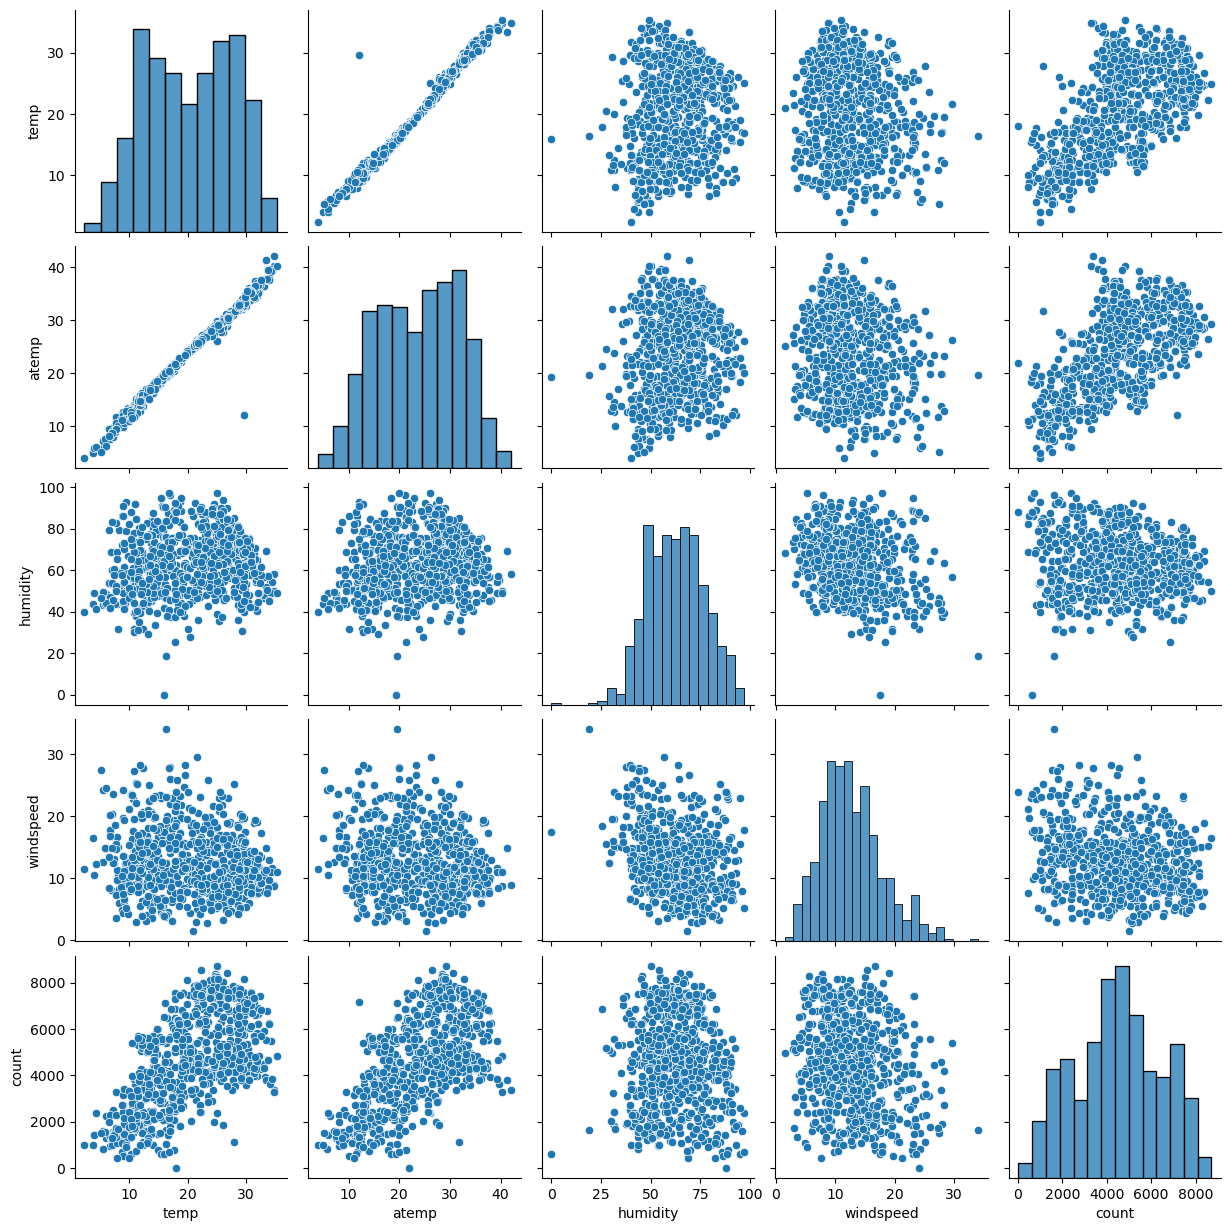

In [25]:
# Analysing or visualizing continous variables, tem, atemp, humidity and windspeed, to see the impact of these variable
# against the target varioable - count.

sns.pairplot(data=bikesharing,vars=['temp','atemp','humidity','windspeed','count'])
plt.show()

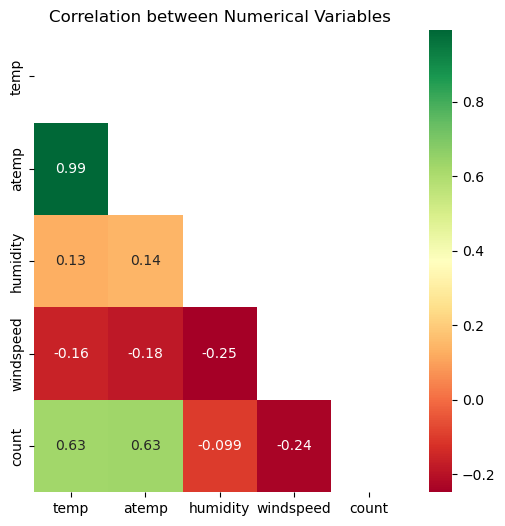

In [26]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(bikesharing[['temp','atemp','humidity','windspeed','count']].corr())
sns.heatmap(bikesharing[['temp','atemp','humidity','windspeed','count']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

#### - There is a strong linear relationship exist betwee temp and atemp, hence to avoid multicollinearity one of them has to be removed. Based on the p-value and VIF, we will decide which to keep in the modeling,

## 4. Data Preparation

In [27]:
# Create dummy variables for season, weathersit, weekday and month

months_dummy = pd.get_dummies(bikesharing.month, dtype = int, drop_first=True)
weekdays_dummy = pd.get_dummies(bikesharing.weekday, dtype = int, drop_first=True)
weathersit_dummy = pd.get_dummies(bikesharing.weathersit, dtype = int, drop_first=True)
seasons_dummy = pd.get_dummies(bikesharing.season, dtype = int, drop_first=True)
 

In [28]:
# Merging  the dataframe, with the dummy variable dataset. 

bikesharing = pd.concat([bikesharing,months_dummy,weekdays_dummy,weathersit_dummy,seasons_dummy],axis=1)
bikesharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,2018,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,2018,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,2018,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,2018,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,2018,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [29]:
# Now the original variables, season, weathersit, weekday and month can be removed
bikesharing.drop(columns=['season','month','weekday','weathersit'], axis=1, inplace=True)

In [30]:
# since we have done with EDA, we can now change values of year column to the orignal value 
year_dict = {2018:0, 2019:1}
bikesharing.year = bikesharing.year.map(year_dict)

In [31]:
bikesharing.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [32]:
bikesharing.shape

(730, 30)

## 5. Splitting the dataset into training dataset and testing dataset



In [33]:
np.random.seed(0)

df_train, df_test = train_test_split(bikesharing, train_size = 0.7, random_state=100)

In [34]:
df_train.shape

(510, 30)

In [35]:
df_train.shape

(510, 30)

### Rescaling (this can be either before the split or after this split)

In [36]:
# rescale numnerical variables 'temp','atemp','humidity','windspeed','count'

scaler = MinMaxScaler()

num_vars = ['temp','atemp','humidity','windspeed','count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [37]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


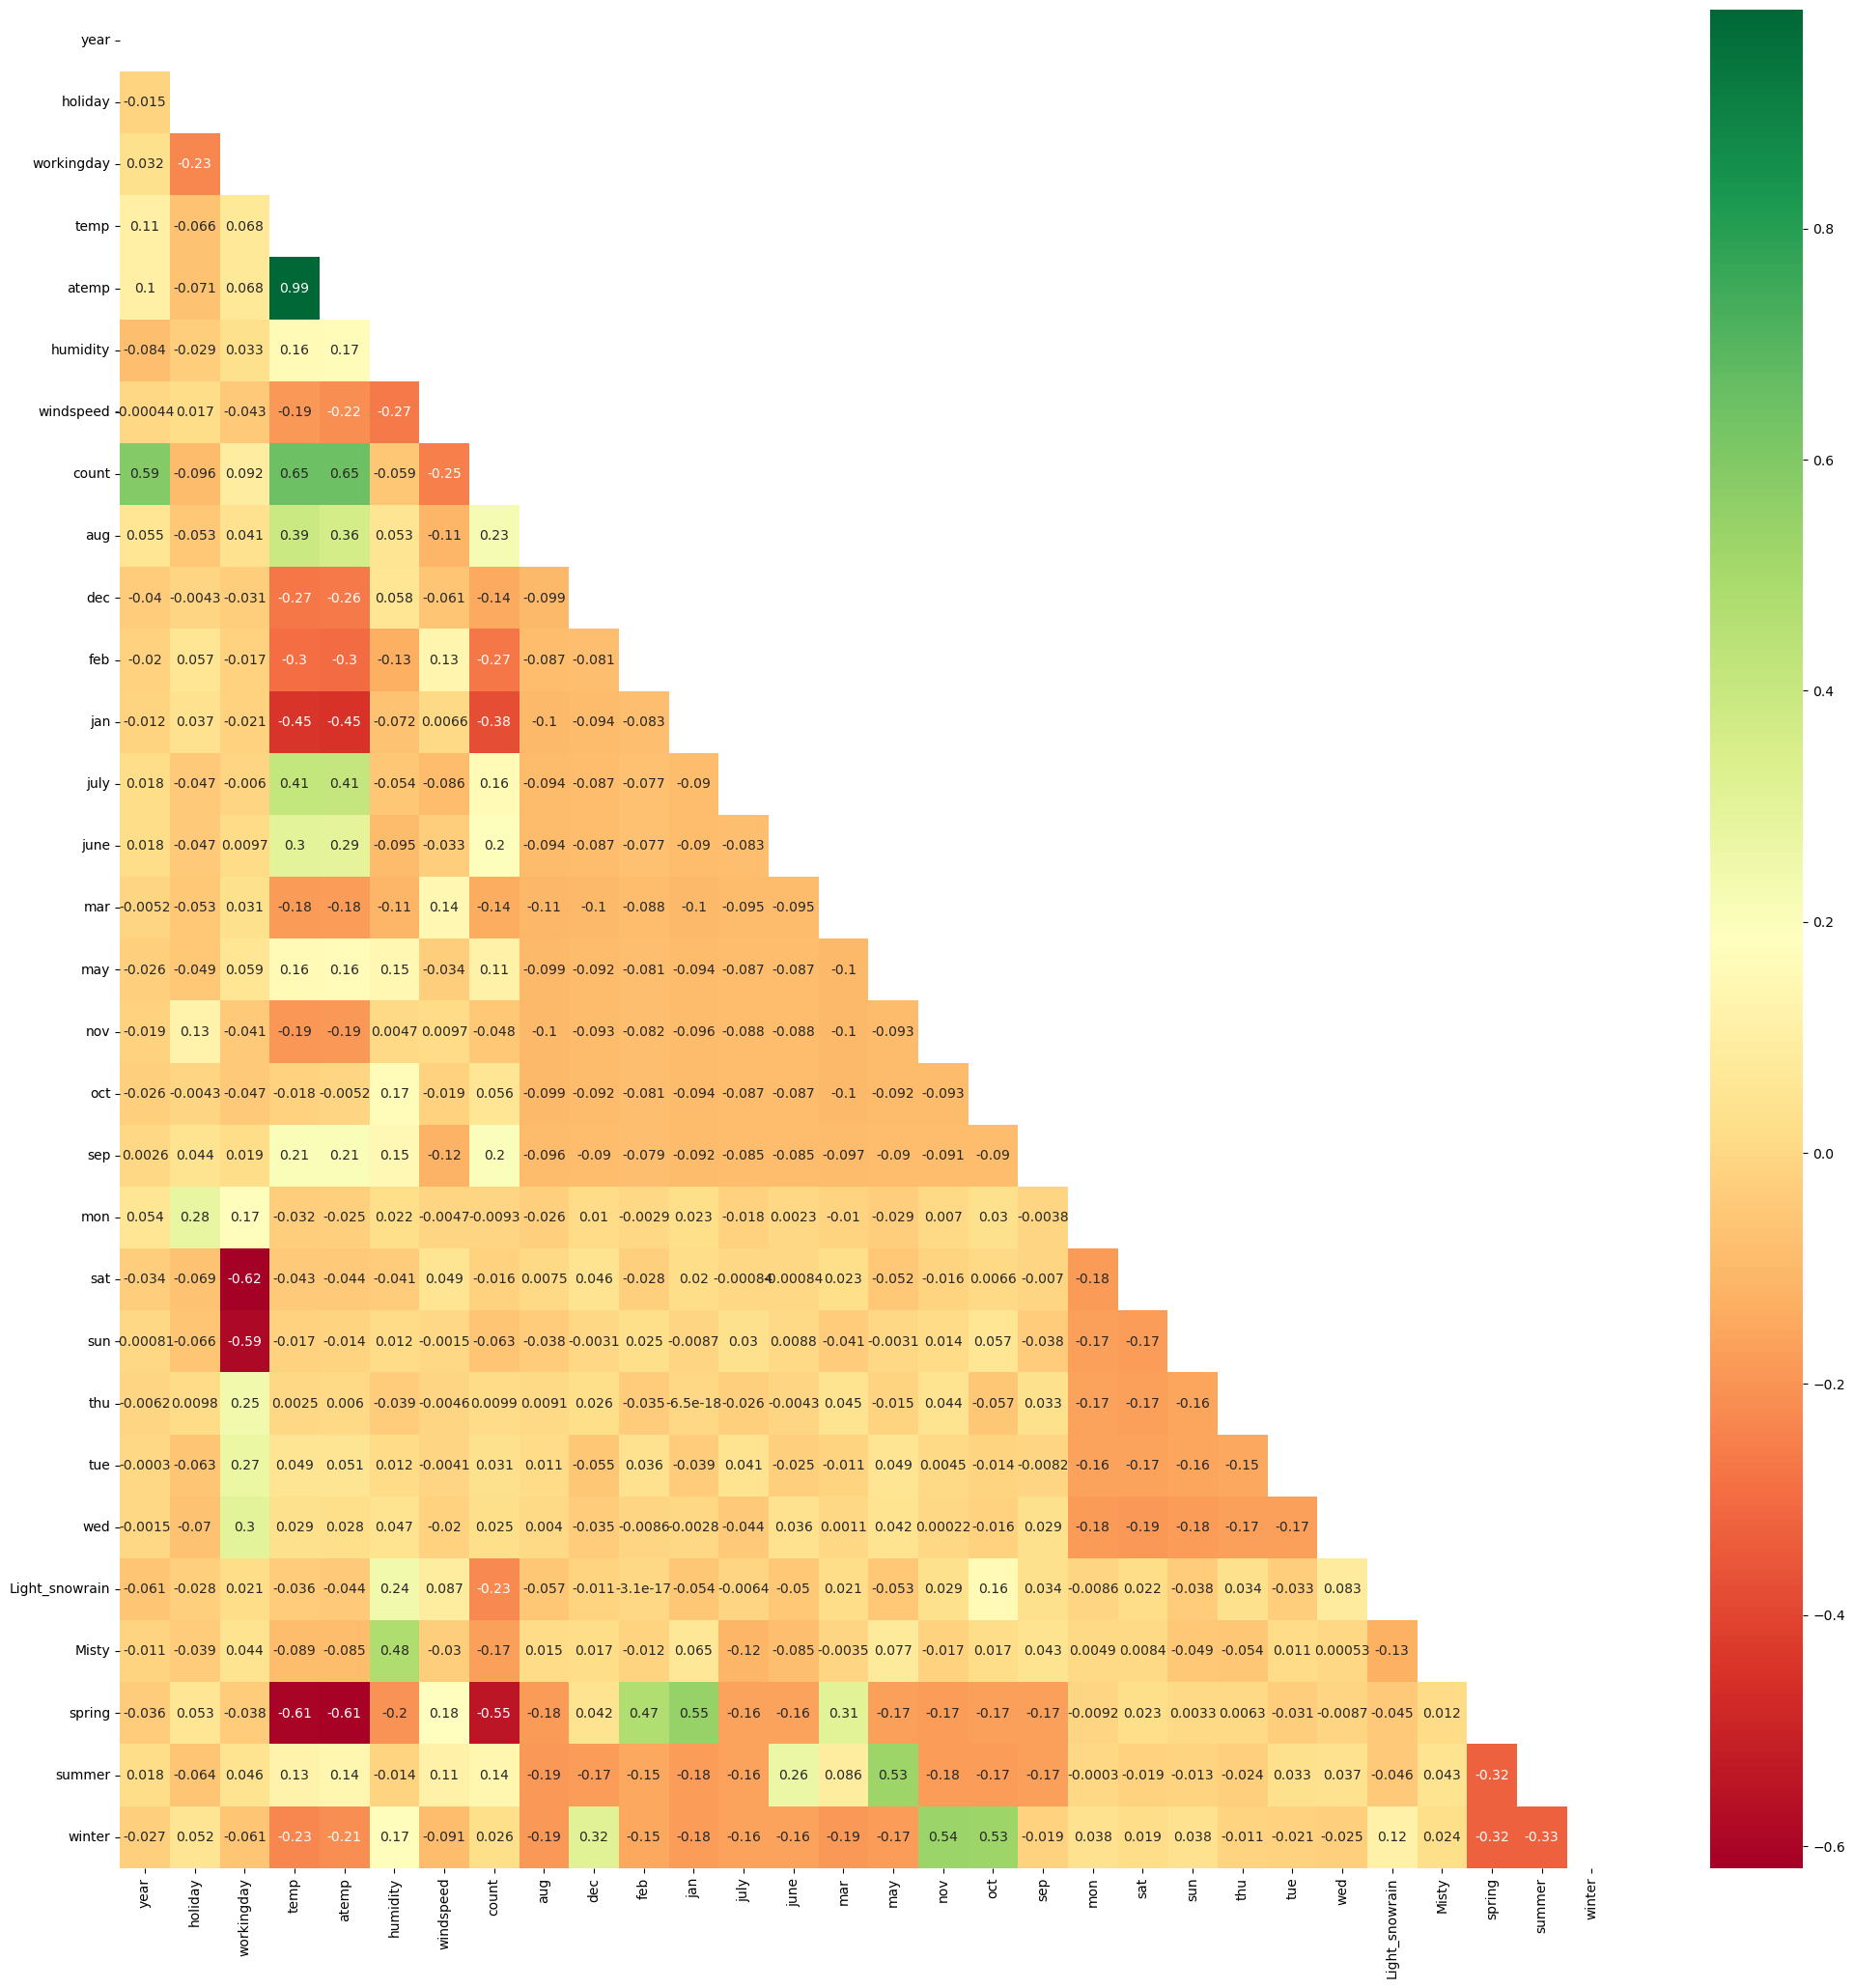

In [38]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

#### - Among the continous variables, temp and atemp show strong correlation with count. Similarly, winter with nov and oct. and summer with May 

In [39]:
# Lets build linear model to see the p-value and VIF to decide which of the variable can be removed

y_train = df_train.pop('count')
X_train = df_train

In [40]:
# Recursive feature elimination

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

rfe = RFE(lr_model, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [41]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 13),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 11),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 12),
 ('tue', False, 10),
 ('wed', False, 14),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [42]:
# selected variable via RFE in col list

selected = X_train.columns[rfe.support_]
selected

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'july', 'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring',
       'summer', 'winter'],
      dtype='object')

In [43]:
# Rejected variables by RFE

rejected = X_train.columns[~rfe.support_]
rejected

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

In [44]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif



In [45]:
# calculate VIF for selected variables
X_train_rfe = X_train[selected]
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,50.68
8,sat,12.20
9,sun,11.79
12,spring,5.02
3,temp,3.62
14,winter,3.49
1,holiday,2.91
13,summer,2.62
4,humidity,1.91
11,Misty,1.57


#### Workingday shows high value,so we need to remove

## 6. Building a linear model

In [46]:
# Building 1st linear refression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.11e-191
Time:                        17:01:43   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1995      0.028      7.

In [47]:
# remove those variables with high VIF values - workingday, sat and sun will be removed


X_train_rfe = X_train_rfe.drop(['workingday','sat'], axis = 1)

In [48]:
calculateVIF(X_train_rfe)

,Features,VIF
3,humidity,28.24
2,temp,16.04
4,windspeed,4.66
10,spring,4.01
12,winter,3.34
11,summer,2.79
9,Misty,2.30
0,year,2.08
5,july,1.59
6,sep,1.39


In [49]:
X_train_rfe = X_train_rfe.drop(['humidity'], axis = 1)

In [50]:
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,5.14
3,windspeed,4.60
10,summer,2.24
9,spring,2.11
0,year,2.07
11,winter,1.81
4,july,1.59
8,Misty,1.56
5,sep,1.34
6,sun,1.18


In [51]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_rfe)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.45e-189
Time:                        17:01:43   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2060      0.029      7.

#### We can cosider the above model i.e lr_2, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
#### F-Statistics value of 218.9 and the p-value of 1.45e-189 i.e almost equals to zero, states that the overall model is significant

## Residual Analysis of the train data and validation

In [52]:
X_train_rfe

,year,holiday,temp,windspeed,july,sep,sun,Light_snowrain,Misty,spring,summer,winter
576,1,0,0.815169,0.264686,1,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,1,1,0,0
728,1,0,0.245101,0.663106,0,0,1,0,0,1,0,0
482,1,0,0.395666,0.188475,0,0,0,0,1,0,1,0
111,0,0,0.345824,0.380981,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.187140,0,0,0,0,0,0,0,0
53,0,0,0.202618,0.111379,0,0,0,0,0,1,0,0
350,0,0,0.248216,0.431816,0,0,0,0,1,0,0,1
79,0,0,0.462664,0.529881,0,0,0,0,1,0,1,0


In [53]:
y_train_pred = lr_2.predict(X_train_lm_2)

Text(0.5, 0, 'Errors')

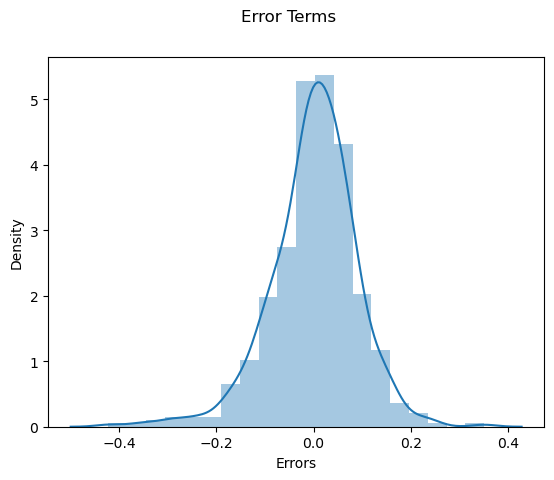

In [54]:
# Plot histogram for the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins=20)
fig.suptitle('Error Terms')
plt.xlabel('Errors')

#### Error terms seems to be normally distributted

## Multicollinearity of the model variables

In [55]:
calculateVIF(X_train_lm_2)

,Features,VIF
0,const,52.72
10,spring,4.96
3,temp,3.38
12,winter,3.35
11,summer,2.60
5,july,1.48
6,sep,1.29
4,windspeed,1.09
8,Light_snowrain,1.05
9,Misty,1.05


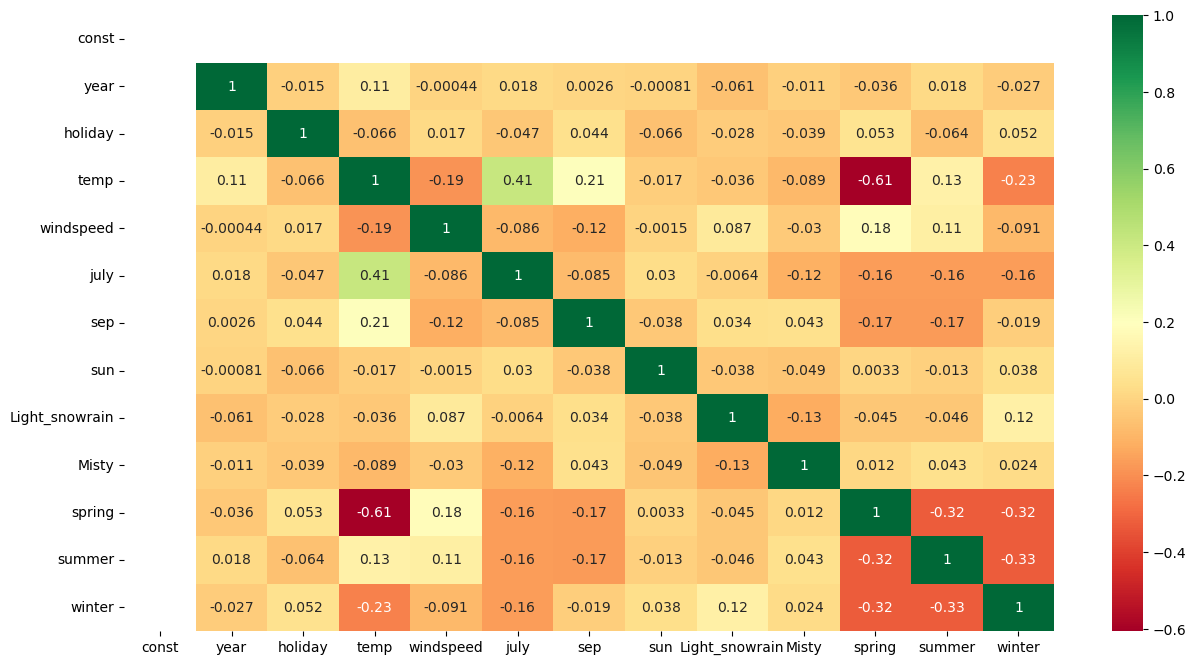

In [56]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_lm_2.corr(),annot = True, cmap="RdYlGn")
plt.show()

In [57]:
# Lets drop variable July and build model 3 as there is some relationship with temp variable

X_train_rfe = X_train_rfe.drop(['july'], axis = 1)

X_train_lm_3 = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.2
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          3.23e-189
Time:                        17:01:44   Log-Likelihood:                 503.99
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     498   BIC:                            -933.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1981      0.029      6.

### R-Squared reduced a bit but F-Statistic has improved a lot, so lets finalize this model

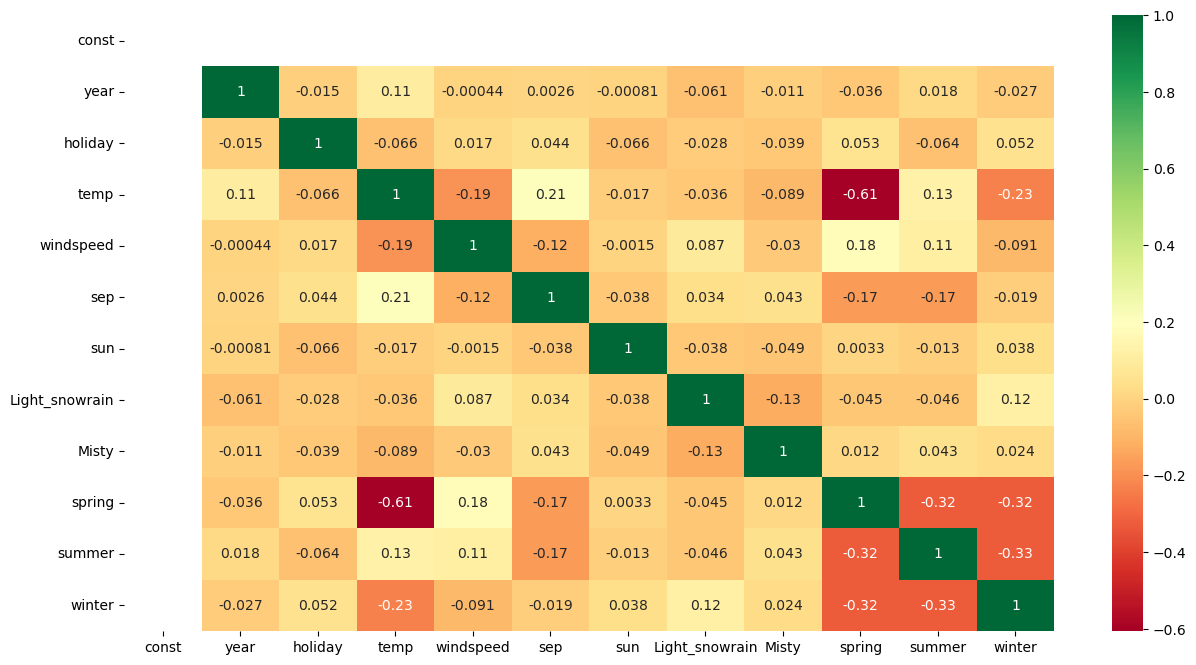

In [58]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_lm_3.corr(),annot = True, cmap="RdYlGn")
plt.show()

In [59]:
calculateVIF(X_train_lm_3)

,Features,VIF
0,const,52.17
9,spring,4.76
3,temp,3.31
11,winter,3.11
10,summer,2.25
5,sep,1.17
4,windspeed,1.09
7,Light_snowrain,1.05
8,Misty,1.04
1,year,1.02


### Linearity

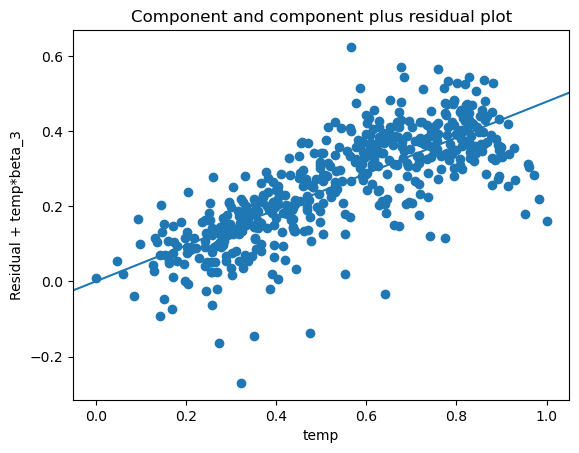

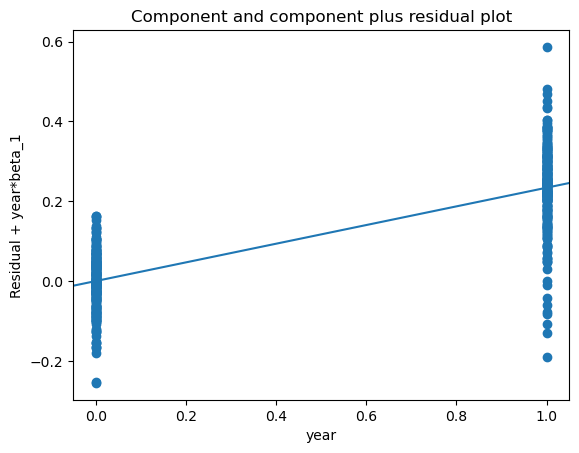

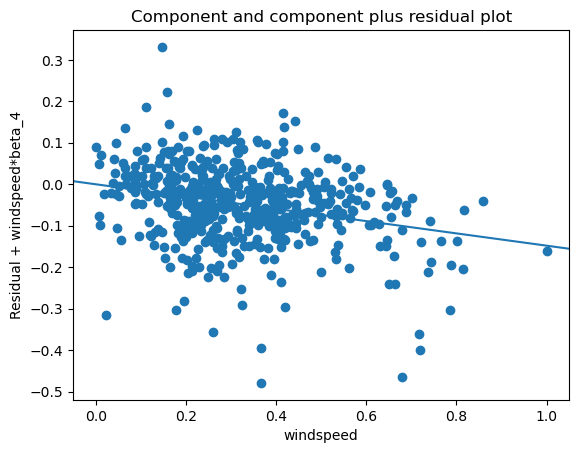

In [60]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_3, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_3, 'year')
plt.show()

sm.graphics.plot_ccpr(lr_3, 'windspeed')
plt.show()

### Homoscedasticity

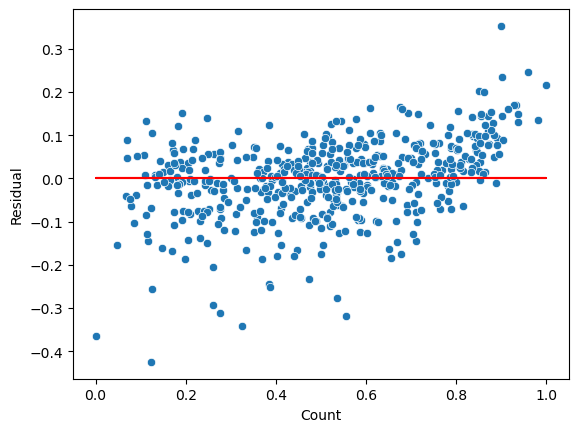

In [61]:
y_train_pred = lr_3.predict(X_train_lm_3)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

## Making predictions on test data using the Final Model


In [62]:
df_test.shape

(220, 30)

In [63]:
# Applying scaling on the test dataset
num_vars = ['temp','atemp','humidity','windspeed','count']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [64]:
X_train_rfe.shape

(510, 11)

In [65]:
y_test = df_test.pop('count')
X_test = df_test

driver_vars = X_train_rfe.columns
X_test = X_test[driver_vars]
X_test.shape

(220, 11)

In [66]:
# Adding constant variable to test dataframe
X_test_lm_3 = sm.add_constant(X_test)

y_pred = lr_3.predict(X_test_lm_3)

## 8. Model Evaluation

In [67]:
# R^2 value for the test dataset

r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8066

In [68]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7963


#### There is no big difference between r2 and adjusted r2 which is good for multiple linear regression

In [82]:
# Mean Square Error - accuracy of model prediction test data

np.square(y_test - y_pred).mean()

0.009249175241095092

#### Model with MSE value 0.00925 seems be having good performance as it gives relatively low error.

In [69]:
round(lr_3.params,4)

const             0.1981
year              0.2340
holiday          -0.1043
temp              0.4782
windspeed        -0.1480
sep               0.0894
sun              -0.0495
Light_snowrain   -0.2904
Misty            -0.0809
spring           -0.0544
summer            0.0623
winter            0.0969
dtype: float64

We can see that the equation of our best fitted line is:

count = 0.1981 + 0.2340 * year + 0.4782 * temp - 0.1043 * holiday + ... +  0.0969 * winter

Text(0, 0.5, 'y_pred')

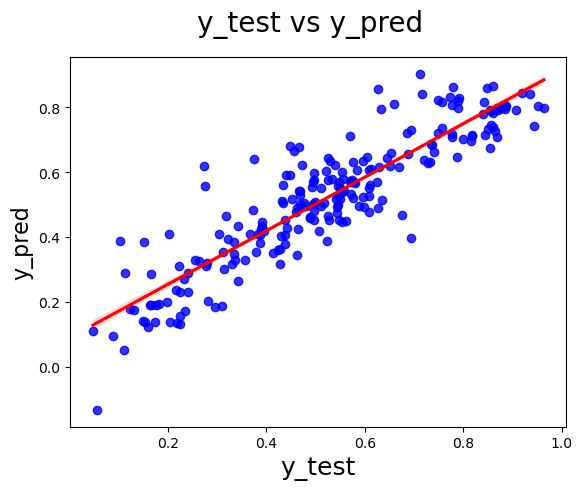

In [70]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

### Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.839
- Test dataset R^2           : 0.8066
- Train dataset Adjusted R^2 : 0.835   
- Test dataset Adjusted R^2  : 0.7963

### Demand of bikes depend on year, holiday, temp, windspeed, sep, sun, Light_snowrain, Misty, spring, summer and winter.